In [15]:
!unzip drive/MyDrive/nlp/dataset.zip

Archive:  drive/MyDrive/nlp/dataset.zip
  inflating: dataset.csv             


In [2]:
!pip install pandas numpy matplotlib simple-elmo nltk sklearn

     |████████████████████████████████| 51kB 5.9MB/s 


In [3]:
!wget http://vectors.nlpl.eu/repository/20/194.zip

--2021-05-18 11:17:20--  http://vectors.nlpl.eu/repository/20/194.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207170732 (198M) [application/zip]
Saving to: ‘194.zip’

194.zip             100%[===================>] 197.57M  24.8MB/s    in 8.6s    

2021-05-18 11:17:30 (22.9 MB/s) - ‘194.zip’ saved [207170732/207170732]



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing


In [6]:
from simple_elmo import ElmoModel
import tensorflow as tf
tf.compat.v1.reset_default_graph()

model = ElmoModel()

PATH_TO_ELMO='194.zip'

model.load(PATH_TO_ELMO, max_batch_size = 5)

2021-05-18 11:17:34,981 : INFO : Loading model from 194.zip...
2021-05-18 11:17:34,982 : INFO : 
            Assuming the model is a ZIP archive downloaded from the NLPL vector repository.
            Loading a model from a ZIP archive directly is slower than from the extracted files,
            but does not require additional disk space
            and allows to load from directories without write permissions.
            
2021-05-18 11:17:34,989 : INFO : We will cache the vocabulary of 100 tokens.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:903: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_varia

'The model is now loaded.'

In [16]:
data = pd.read_csv('dataset.csv', encoding="latin-1")
data = data[['text', 'sentiment']]
data['sentiment'] = data['sentiment'].astype('category')

# Transform sentiment values to integers
label_encoder = preprocessing.LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

data = data[data['text'].isnull() == False]

data.head()

2021-05-18 11:39:38,247 : INFO : NumExpr defaulting to 2 threads.


,text,sentiment
0,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,9
1,@politico No. We should remember very clearly ...,4
2,@cricketworldcup Guess who would be the winner...,9
3,Corbyn is too politically intellectual for #Bo...,9
4,All the best to #TeamIndia for another swimmin...,9


In [7]:
from nltk.tokenize import TweetTokenizer

token = TweetTokenizer()
data['tokenized'] = data['text'].astype(str).apply(token.tokenize)


In [22]:
# save checkpoint
# data.to_pickle('data.pickle')

# load checkpoint
data = pd.read_pickle('drive/MyDrive/nlp/data.pickle')

In [23]:
sample = np.random.choice(range(data.shape[0]), 2000, replace=False)
data_sampled = data.iloc[sample]

In [24]:
embeddings = model.get_elmo_vector_average(data_sampled['tokenized'])

2021-05-18 11:41:43,092 : INFO : Warming up ELMo on 5 sentences...
2021-05-18 11:41:44,094 : INFO : Warming up finished.
2021-05-18 11:41:44,101 : INFO : Texts in the current batch: 5
2021-05-18 11:41:44,722 : INFO : Texts in the current batch: 5
2021-05-18 11:41:44,908 : INFO : Texts in the current batch: 5
2021-05-18 11:41:45,126 : INFO : Texts in the current batch: 5
2021-05-18 11:41:45,358 : INFO : Texts in the current batch: 5
2021-05-18 11:41:45,571 : INFO : Texts in the current batch: 5
2021-05-18 11:41:45,745 : INFO : Texts in the current batch: 5
2021-05-18 11:41:46,181 : INFO : Texts in the current batch: 5
2021-05-18 11:41:46,372 : INFO : Texts in the current batch: 5
2021-05-18 11:41:46,870 : INFO : Texts in the current batch: 5
2021-05-18 11:41:47,022 : INFO : Texts in the current batch: 5
2021-05-18 11:41:47,475 : INFO : Texts in the current batch: 5
2021-05-18 11:41:47,635 : INFO : Texts in the current batch: 5
2021-05-18 11:41:47,924 : INFO : Texts in the current batch:

In [29]:
np.save('drive/MyDrive/nlp/elmo_embeddings.npy', embeddings)

In [26]:
import matplotlib.pyplot as plt

num_labels = 20

def plot_embeding2(E, y):
  plt.figure(1,figsize=(12,12))
  cmap = plt.cm.get_cmap('nipy_spectral')

  for index in range(num_labels):
      cls_label = label_encoder.inverse_transform([index])[0]

      E_cls = E[y == index, :]

      color = cmap((index + 1) / num_labels)

      plt.scatter(E_cls[:,0], E_cls[:,1], color=color, s=1)
      E_mean = np.mean(E_cls, axis=0)
      
      plt.scatter(E_mean[0], E_mean[1], s=50, color=color)
      plt.annotate(cls_label, xy=(E_mean[0], E_mean[1]), size=10)

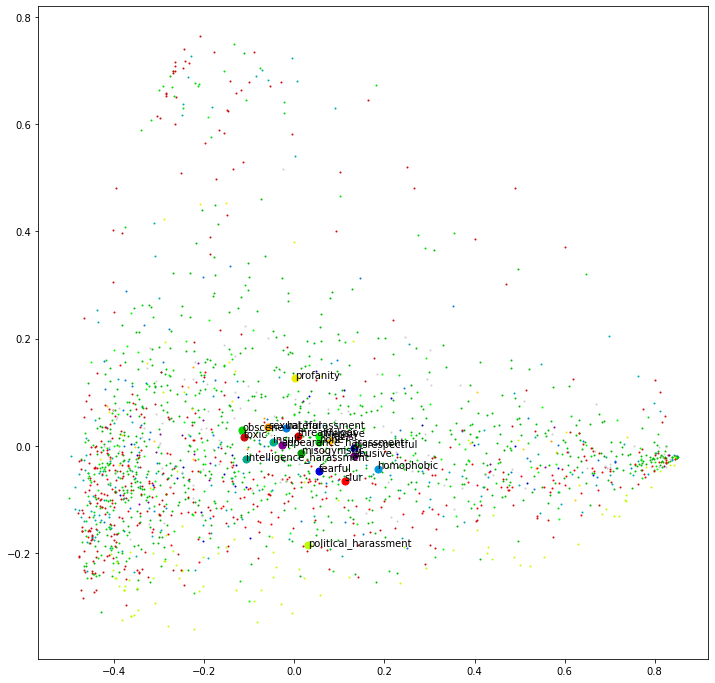

In [27]:
from sklearn.decomposition import PCA

plot_embeding2(PCA(n_components = 2).fit_transform(embeddings), data_sampled['sentiment'])
plt.savefig('drive/MyDrive/nlp/elmo_pca.png')

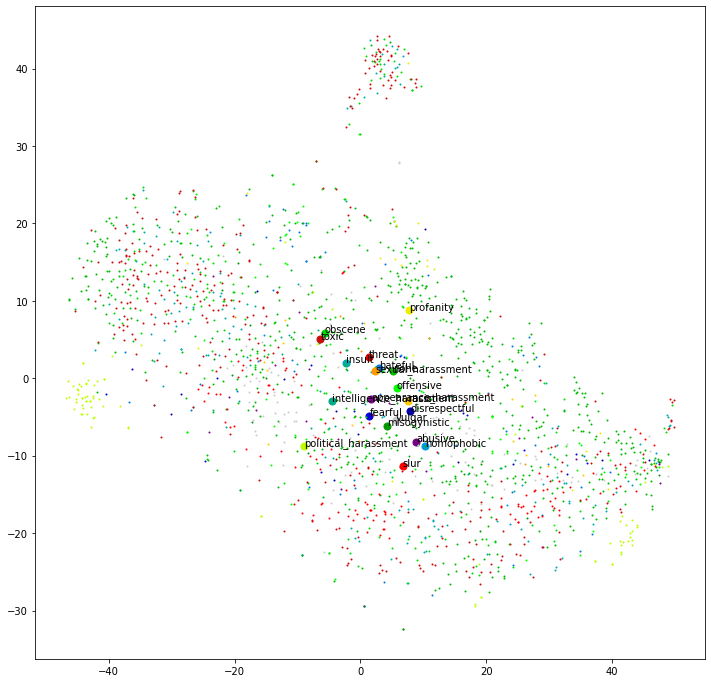

In [28]:
from sklearn.manifold import TSNE

plot_embeding2(TSNE(n_components = 2).fit_transform(embeddings), data_sampled['sentiment'])
plt.savefig('drive/MyDrive/nlp/elmo_tsne.png')